In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

data_loc = 'https://github.com/dknife/ML/raw/main/data/'
life = pd.read_csv(data_loc +  'life_expectancy.csv')
#데이터 불러오기 
life.head()

life = life[['Life expectancy', 'Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
life.dropna(inplace = True)
X = life[['Alcohol', 'Percentage expenditure', 'Polio', 'BMI', 'GDP', 'Thinness 1-19 years']]
y = life['Life expectancy']

In [4]:
from sklearn.preprocessing import PolynomialFeatures #preprocessing 서브모듈의 polynomialFeature 클래스를 활용
poly_feature = PolynomialFeatures(degree = 3)        #3차다항식을 위한 다항식으로 변환
X = poly_feature.fit_transform(X)                    

변환한 데이터를 이용하여 학습을 수행하고, 훈련용 데이터와 검증용 데이터를 실제 데이터와 비교

Mean squred error: 21.59889394280327


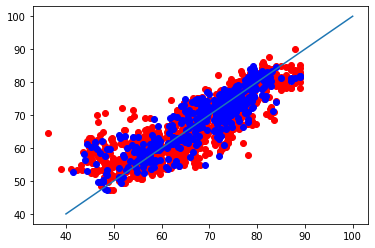

In [5]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.2) 
lin_model = LinearRegression()                      #선형회귀
lin_model.fit(X_train, y_train)                     #x와 y를 학습시키겠다.

y_hat_train = lin_model.predict(X_train)
y_hat_test = lin_model.predict(X_test)
plt.scatter(y_train, y_hat_train, color='r')        #붉은색이 훈련용 데이터
plt.scatter(y_test, y_hat_test, color='b')          #파란색이 검증용 데이터
plt.plot([40, 100], [40, 100])
print('Mean squred error:', mean_squared_error(y_test, y_hat_test))  #평균제곱오차(MSE) : 26 //줄어들었다.

!!선형 회귀와 다항 회귀
다항회귀를 통해 더 좋은 예측 성능을 가진 회귀 함수 찾기 가능
(그렇다고 언제나 다항회귀가 더 옳은 것은 아니다.)

In [6]:
print('Mean squred error:', mean_squared_error(y_train, y_hat_train)) #MSE가 더 줄어들었다.

Mean squred error: 23.326396861575244


4차 다항 회귀,6차 다항 회귀, 8차 다항 회귀
------------------------------------>
과적합 : 훈련용 데이터에만 지나치게 맞춰진 것 , 일반화 능력 감소

In [7]:
X.shape #차수를 15정도로 높인것

(2306, 84)

정보량 = 엔트로피
섞여있는 데이터들의 정보량이 얼마인지 알 수 있다.
정보이득(정보량의 감소) = 원래의 정보량 - 분할 후의 정보량

분류를 학습하면서 다루었던 붓꽃 데이터를 이용하여 결정 트리를 만들어보자

In [8]:
from sklearn.datasets import load_iris
iris = load_iris()
X,y = iris.data, iris.target
#결정 트리 클래스 import한 뒤, 읽어들인 데이터를 이용하여 학습을 하도록한다. 우선 결정트리 분류기를 dec_tree라는 이름으로 생성 
#이때 트리의 깊이는 3

In [9]:
from sklearn.tree import DecisionTreeClassifier
dec_tree = DecisionTreeClassifier(max_depth=3)
dec_tree.fit(X,y)

DecisionTreeClassifier(max_depth=3)

In [11]:
from sklearn.tree import export_graphviz
export_graphviz(
    dec_tree, 
    out_file=("./dec_tree_for_iris.dot"),
    feature_names=iris.feature_names,
)


dot파일을 실행하여 jpg를 만든다.

In [15]:
!dot  -Tjpg dec_tree_for_iris.dot -o dec_tree_for_iris.jpg

import matplotlib.pyplot as plt
dec_tree_img = plt.imread('./dec_tree_for_iris.jpg')
plt.figure(num=None, figsize=(12, 8), dpi=80,
            facecolor='w', edgecolor='k')
plt.imshow(dec_tree_img)

'dot'��(��) ���� �Ǵ� �ܺ� ����, ������ �� �ִ� ���α׷�, �Ǵ�
��ġ ������ �ƴմϴ�.


FileNotFoundError: [Errno 2] No such file or directory: './dec_tree_for_iris.jpg'